# Welcome to Jupyter!

In [2]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import math

In [30]:
# 연습문제 3.2
#clgs
def clgs(A):
  m, n = A.shape
  V = A.astype(np.float64)
  Q = np.eye(m, n).astype(np.float64)
  R = np.zeros([n, n])
  for j in range(n):
    for i in range(j):
      R[i, j] = np.matmul(Q[:, i].reshape(1, -1), A[:, j].reshape(-1, 1))
      V[:, j] = V[:, j] - R[i, j] * Q[:, i]
  
    R[j, j] = linalg.norm(V[:, j])
    Q[:, j] = V[:, j] / R[j, j]
  return Q, R
# mgs
def mgs(A):
  m, n = A.shape
  Q = A.astype(np.float64)
  R = np.zeros([n, n]).astype(np.float64)
  for i in range(n - 1):
    R[i, i] = linalg.norm(Q[:, i])
    Q[:, i] = Q[:, i]/ R[i, i]
    R[i, i+1:n] = np.matmul(Q[:, i], Q[:, i+1:n])
    Q[:, i+1:n] = Q[:, i+1:n] - np.multiply(Q[:, i].reshape(-1, 1), R[i, i+1:n].reshape(1, -1))
  R[n-1, n-1] = linalg.norm(Q[:, n-1])
  Q[:, n-1] = Q[:, n-1] / R[n-1, n-1]
  return Q, R 

input1 = np.random.randn(80, 80)
input2 = np.random.randn(80, 80)
U, X = np.linalg.qr(input1)
V, X = np.linalg.qr(input2)
J = np.arange(80+1)[1:]
JJ = []
for j in J:
  JJ.append(2.**(-j))
S = np.diag(JJ)
A = np.matmul(np.matmul(U, S), V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)
print('A')
print(A)
print('clgs q & r')
print(Qc)
print(Rc)
print('mgs q & r')
print(Qm)
print(Rm)
print('clgs qr mul')
print(np.matmul(Qc, Rc))
print('mgs qr mul')
print(np.matmul(Qm, Rm))

A
[[ 0.00435668  0.00234036 -0.00157983 ... -0.00327886 -0.00057506
   0.00170767]
 [ 0.00683588  0.00409357 -0.00623971 ... -0.00749207 -0.00593866
   0.00700683]
 [ 0.00738429  0.00801352 -0.01347577 ... -0.01733601 -0.00595291
   0.01642054]
 ...
 [-0.00418296 -0.00103936  0.00050697 ...  0.00082281  0.0014471
  -0.00136493]
 [-0.00921636 -0.00778317  0.01542013 ...  0.01503971  0.01427604
  -0.01801755]
 [-0.00742234 -0.00688379  0.01177925 ...  0.0147248   0.00577523
  -0.01385859]]
clgs q & r
[[ 0.06701032 -0.03702007  0.09767972 ... -0.01396831 -0.04253625
  -0.01015125]
 [ 0.10514288 -0.03883157 -0.0271771  ...  0.00467487  0.0060695
   0.00402834]
 [ 0.11357804  0.12215353  0.00276871 ...  0.16453785 -0.19385011
   0.16666894]
 ...
 [-0.06433827  0.0907237  -0.00515773 ...  0.09345547 -0.08224678
   0.09299801]
 [-0.14175725 -0.05109368  0.18763832 ... -0.26797132  0.23764491
  -0.26665803]
 [-0.11416338 -0.06927772  0.03436587 ...  0.04553833 -0.06297126
   0.05112032]]
[[ 6.

clgs qr
mgs qr


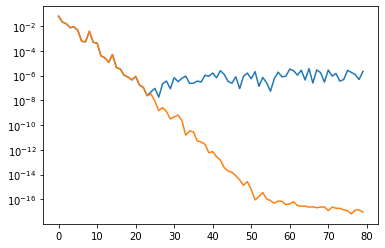

In [33]:
#('clgs qr')
j = np.arange(0, 80)
r = []
for i in range(80):
  r.append(Rc[i,i])
plt.semilogy(j, r)

#('mgs qr')
j = np.arange(0, 80)
r = []
for i in range(80):
  r.append(Rm[i,i])
plt.semilogy(j, r) #--> mgs is more stable then clgs

In [35]:
def grhouse(A):
  m, n = A.shape
  R = A.astype(np.float64)
  V = np.zeros([m, n]).astype(np.float64)
  for k in range(min(m-1, n)):
    x = R[k:m, k]
    v = x + (np.sign(x[0]) * linalg.norm(x) * np.eye(len(x), 1)).reshape(-1)
    V[k:m, k] = v
    R[k:m, k:n] = R[k:m, k:n] - \
    2 *np.matmul(v.reshape(-1, 1), np.matmul(v.reshape(1, -1), R[k:m, k:n])) \
    / (np.matmul(v.reshape(1, -1), v.reshape(-1, 1)))

  R = np.triu(R[0:n, 0:n])
  return V, R

def formQ(V):
  m, n = V.shape
  V = V.astype(np.float64)
  Q = np.eye(m).astype(np.float64)
  for j in range(min(m-1, n)-1, -1, -1):
    v = V[:, j]
    Q = Q - 2*np.matmul(v.reshape(-1, 1), np.matmul(v.reshape(1, -1), Q)) \
    / (np.matmul(v.reshape(1, -1), v.reshape(-1, 1)))
  return Q

A = np.array([[0.70000, 0.70711], 
             [0.70001, 0.70711]])

Qm, Rm = mgs(A)
[V, R] = grhouse(A)
Q = formQ(V)
print('Q', Q)
print('R', R)
print('mul', np.matmul(Q, R))

print(linalg.norm(np.matmul(Q.transpose(), Q) - np.eye(2)))
print(linalg.norm(np.matmul(Qm.transpose(), Qm) - np.eye(2)))
#---> householder is more stable then modified


Q [[-0.70710173 -0.70711183]
 [-0.70711183  0.70710173]]
R [[-9.89956565e-01 -1.00000455e+00]
 [ 0.00000000e+00 -7.14283864e-06]]
mul [[0.7     0.70711]
 [0.70001 0.70711]]
3.451616545114987e-16
3.254726094493924e-11


In [36]:
# 연습문제 3.3
def Givensrotation(A):
  m, n = A.shape
  A = A.astype(np.float64)
  Q = np.eye(m).astype(np.float64)
  for j in range(n):
    for i in range(m-1, j, -1):
      theta = math.atan(A[i, j]/ A[i-1, j])
      q_base = np.eye(m).astype(np.float64)
      q_base[i, i] = math.cos(theta)
      q_base[i-1, i-1] = math.cos(theta)
      q_base[i, i-1] = -math.sin(theta)
      q_base[i-1, i] = math.sin(theta)
      A = np.dot(q_base.astype(np.float64), A).round(12)
      Q = np.matmul(q_base.astype(np.float64), Q).round(12)
  
  Q = Q.transpose()
  R = A
  return Q, R

# check with qr pakage
A = np.array([[1, 2, 3, 4],
              [3, 2, 1, 4],
              [6, 3, 7, 4],
              [8, 3, 7, 4],
              [2, 4, 5, 3]])
q1, r1 = np.linalg.qr(A)
q2, r2 = Givensrotation(A)
print('q1 r1', q1, r1)
print('q2 r2', q2, r2) # 부호차이는 존재
print('q1 r1 mul', np.matmul(q1, r1))
print('q2 r2 mul', np.matmul(q2, r2))

q1 r1 [[-0.09365858 -0.42193106 -0.20758002  0.81349168]
 [-0.28097574 -0.13402516  0.89814326  0.2171389 ]
 [-0.56195149  0.01489168 -0.38433133  0.13610142]
 [-0.74926865  0.30279759 -0.01027624 -0.16103603]
 [-0.18731716 -0.84386213 -0.04932595 -0.49661433]] [[-10.67707825  -5.43219771 -10.67707825  -7.30536933]
 [  0.          -3.53429315  -3.39530409  -3.4846542 ]
 [  0.           0.          -2.73347949   1.03584486]
 [  0.           0.           0.           2.53294087]]
q2 r2 [[ 0.09365858 -0.42193106  0.20758002  0.81349168  0.32915661]
 [ 0.28097574 -0.13402516 -0.89814326  0.2171389  -0.22198934]
 [ 0.56195149  0.01489168  0.38433133  0.13610142 -0.71955167]
 [ 0.74926865  0.30279759  0.01027624 -0.16103603  0.56645557]
 [ 0.18731716 -0.84386213  0.04932595 -0.49661433  0.06123844]] [[10.67707825  5.43219771 10.67707825  7.30536933]
 [ 0.         -3.53429315 -3.39530409 -3.4846542 ]
 [ 0.          0.          2.73347949 -1.03584486]
 [ 0.          0.          0.          2.5

/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, 

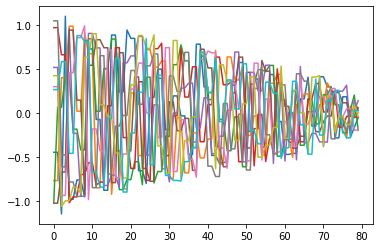

In [49]:
# 연습문제 4.3
#[a]
m = 80
matrix_num = 10
j = np.arange(0, m)
A = []
for i in range(matrix_num):
  a = (np.random.randn(m, m))
  a = a / np.sqrt(m)
  A.append(a)

for i in range(len(A)):
  xw, xv = np.linalg.eig(A[i])
  plt.plot(j, (xw.reshape(-1)))
# 한개의 행렬만 관찰한 경우(m = 8, matrix_num =1) 고유값이 굉장히 불규칙적으로 찍힌다.
# 100개의 행렬을 관찰한 경우(m = 8, matrix_num =100) 인 경우 눈에 띄는 특징은 고유값 그래프가
# 평균(~0)을 기준으로 반복된다는 것이다. 대부분 일정범위 내에서 움직인다.

# m을 8, 16, 32, 64,,,로 증가시키면 시킬수록 위아래로 움직이는 그래프의 주기가 굉장히 작아졌고
# 또한 보이는 모양은 오른쪽으로 눕힌 삼각뿔 모양이었다(옆의 모선은 볼록한 곡선형태)
# m 값이 증가함에 따라 대부분의 행렬의 |최댓값| 이 1로 가까워 졌다

# 따라서 m이 무한대로 가게되면 p(A) 즉 1에 수렴할 것이다. 

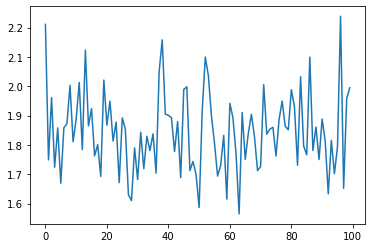

In [51]:
#[b]
m = 16
matrix_num = 100
j = np.arange(0, matrix_num)
A = []
for i in range(matrix_num):
  a = (np.random.randn(m, m))
  a = a / np.sqrt(m)#((a-np.mean(a))/ np.std(a))/ np.sqrt(m)
  A.append(a)

Norm = []
for i in range(len(A)):
  xw, xv = linalg.eig(np.matmul(A[i].transpose(), A[i]))
  eigs = np.max(np.abs(xw.reshape(-1)))
  norm = np.sqrt(eigs)
  Norm.append(norm)
plt.plot(j, Norm)

# A's 2-norm = np.sqrt(p(A.transpose() * A))
# m이 무한대로 갈수록 ||A||의 크기가 점점 1으로 가까워진다.
# 즉, p(A)또한 m이 무한대로 가면 1에 가까워지기 때문에 inequality는 equality에 가까워 질 것이다.

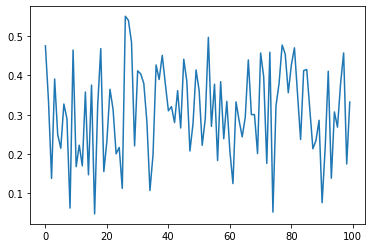

In [62]:
#[c]
m = 32
matrix_num = 100
j = np.arange(0, m**2)
A=[]
for i in range(matrix_num):
  a = (np.random.randn(m, m))
  a = a / np.sqrt(m)#((A-np.mean(A))/ np.std(A))/ np.sqrt(m)
  A.append(a)

j = np.arange(0, matrix_num)
sigma_lists = []
for i in range(matrix_num):
  xw, xv = linalg.eig(A[i])
  sigma_min = np.sqrt(np.abs(xw)).min()
  sigma_lists.append(sigma_min)
plt.plot(j, sigma_lists)
# sigma_min의 경우 m이 증가함에 따라 전체의 평균값이 점점 0에 수렴해 간다.
# m 값이 고정된 상태에서는 일정이상의 행렬개수에서 규칙적으로 매우 크거나 작은 
# 특이값이 등장했다. 즉 고유의 주기 외에 또다른 주기로 파동이 진행하는 모습을 가진다.

tail


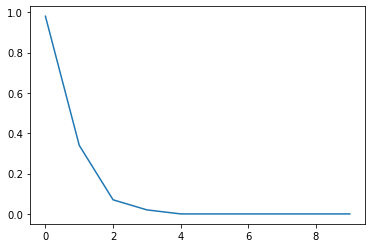

In [63]:
print('tail')
tail_prob_distri = []
power_of_two = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]
for k in range(len(power_of_two)):
  prob_lists = []
  for j in range(len(sigma_lists)):
    if sigma_lists[j] <= power_of_two[k]:
      prob_lists.append(sigma_lists[j])
  tail_prob = len(prob_lists) / len(sigma_lists)
  tail_prob_distri.append(tail_prob)
j = np.arange(0, len(power_of_two))
plt.plot(j, tail_prob_distri)
# 또한 tail distribution 같은 경우는 로그함수를 x축 대칭한 형상으로 나타났으며 
# m 값에 따른 scale비율은 정확하지는 않았으나 이는 m값의 증가에 따라 그래프가
# 완만하게 나타났으므로 그 값은 작아졌다.

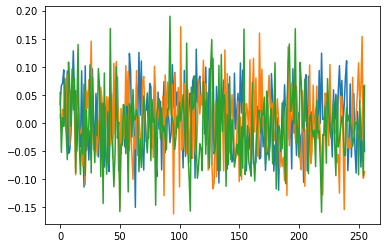

In [64]:
#[d]
# 이경우는 [a], [b], [c]의 경우에서 random.randn에 triu를 취하면 결과를 얻을 수 있다.
# the case of [a]
m = 256
matrix_num = 3
j = np.arange(0, m)
A = []
for i in range(matrix_num):
  a = np.triu(np.random.randn(m, m))
  a = a / np.sqrt(m)
  A.append(a)

for i in range(len(A)):
  xw, xv = np.linalg.eig(A[i])
  plt.plot(j, (xw.reshape(-1)))


# 일반적인 행렬[a]과 달리 상삼각행렬의 경우는 1로 수렴하는 현상이 보이지 않았다.
# 또한 이는 오른 쪽으로 눕힌 삼각뿔 모양이 아닌 그냥 일반적인 s파동 꼴이 나타났으며
# 그 값은 m이 증가함에 따라 0으로 수렴했다.

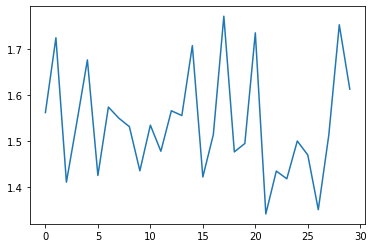

In [65]:
# the case of [b]
m = 16
matrix_num = 30
j = np.arange(0, matrix_num)
A = []
for i in range(matrix_num):
  a = np.triu(np.random.randn(m, m))
  a = a / np.sqrt(m)#((a-np.mean(a))/ np.std(a))/ np.sqrt(m)
  A.append(a)

Norm = []
for i in range(len(A)):
  xw, xv = linalg.eig(np.matmul(A[i].transpose(), A[i]))
  eigs = np.max(np.abs(xw.reshape(-1)))
  norm = np.sqrt(eigs)
  Norm.append(norm)
plt.plot(j, Norm)

# 일반적인 행렬[b]과 매우 유사했으나 수렴하는 성질이 나타나지 않았다

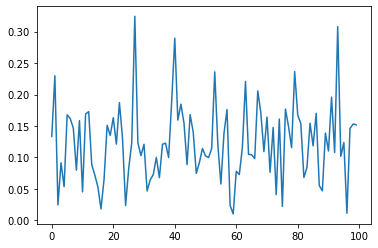

In [68]:
# the case of [c]
m = 16
matrix_num = 100
j = np.arange(0, m**2)
A=[]
for i in range(matrix_num):
  a = np.triu(np.random.randn(m, m))
  a = a / np.sqrt(m)#((A-np.mean(A))/ np.std(A))/ np.sqrt(m)
  A.append(a)

j = np.arange(0, matrix_num)
sigma_lists = []
for i in range(matrix_num):
  xw, xv = linalg.eig(A[i])
  sigma_min = np.sqrt(np.abs(xw)).min()
  sigma_lists.append(sigma_min)
plt.plot(j, sigma_lists)
# sigma_min의 경우 m이 증가함에 따라 전체의 평균값이 점점 0에 수렴해 간다.
# m 값이 고정된 상태에서는 일정이상의 행렬개수에서 규칙적으로 매우 크거나 작은 
# 특이값이 등장했다. 즉 고유의 주기 외에 또다른 주기로 파동이 진행하는 모습을 가진다.

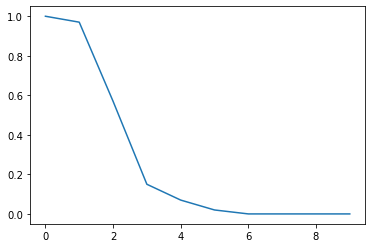

In [69]:
tail_prob_distri = []
power_of_two = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]
for k in range(len(power_of_two)):
  prob_lists = []
  for j in range(len(sigma_lists)):
    if sigma_lists[j] <= power_of_two[k]:
      prob_lists.append(sigma_lists[j])
  tail_prob = len(prob_lists) / len(sigma_lists)
  tail_prob_distri.append(tail_prob)
j = np.arange(0, len(power_of_two))
plt.plot(j, tail_prob_distri)
# tail distribution 같은 경우는 일반적인 행렬[c]과 달리 전체적인 값이 더 컸고 
# 그에 따라 그래프 초반에 1.0인 값이 더 많았다. 이외의 scale특성은 유사하다.

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook